In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data
X_normalized = pd.read_csv("crime_normalized_features.csv")
Y_normalized = pd.read_csv("crime_normalized_targets.csv")

# Replace "?" with NaN in both X and Y
X_normalized = X_normalized.replace("?", np.nan)
Y_normalized = Y_normalized.replace("?", np.nan)

# Prepare numeric dataframe with target included
numeric_df = X_normalized.apply(pd.to_numeric, errors='coerce')
target = pd.to_numeric(Y_normalized['ViolentCrimesPerPop'], errors='coerce')

# Combine temporarily ONLY to drop NaNs safely across both
combined = numeric_df.copy()
combined['ViolentCrimesPerPop'] = target

combined = combined.dropna(axis=1)

# This is the crucial fix. X must NOT contain the target.
Y = combined['ViolentCrimesPerPop']
X = combined.drop(columns=['ViolentCrimesPerPop'])


In [2]:
df = numeric_df.dropna(axis=1)

In [3]:
df

,state,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn
0,8,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.00,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32
1,53,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.00,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00
2,24,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.00,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00
3,34,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.00,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00
4,42,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.00,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,10,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,...,0.00,0.22,0.28,0.34,0.48,0.39,0.01,0.28,0.05,0.00
1990,6,10,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,...,0.00,0.53,0.25,0.17,0.10,0.00,0.02,0.37,0.20,0.00
1991,9,10,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,...,0.02,0.25,0.68,0.61,0.79,0.76,0.08,0.32,0.18,0.91
1992,25,10,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,...,0.01,0.45,0.64,0.54,0.59,0.52,0.03,0.38,0.33,0.22


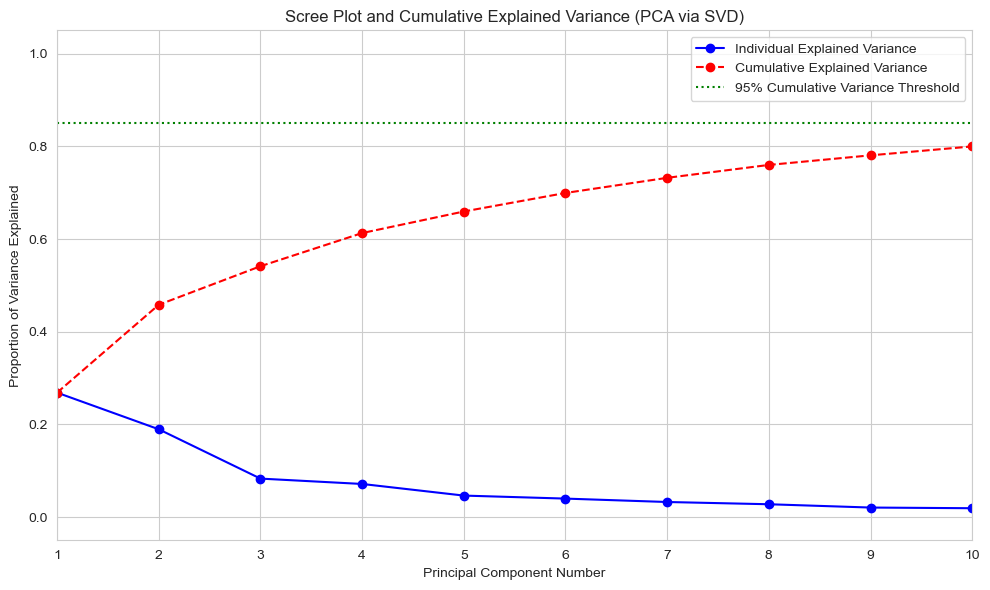

In [4]:
# Drop 'state' and 'fold' columns for manual PCA to align with X_clean
X = X.drop(columns=['state', 'fold'], errors='ignore')

# Crucial: Center the data before PCA (SVD)
X = X - X.mean()

U, s, Vt = np.linalg.svd(X, full_matrices=False)
V = Vt.T

total_variance = np.sum(s**2)

# Calculate the variance explained by each component
explained_variance = s**2 / total_variance

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance)


# 4. Generate the Scree Plot
# Create labels for the components
components = range(1, len(explained_variance) + 1)

# Set the style for the plot
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))

# Plot the individual explained variance (Scree Plot)
plt.plot(components, explained_variance, marker='o', linestyle='-', color='b', label='Individual Explained Variance')

# Plot the cumulative explained variance
plt.plot(components, cumulative_explained_variance, marker='o', linestyle='--', color='r', label='Cumulative Explained Variance')

# Add a horizontal line at 95% cumulative variance (a common threshold)
plt.axhline(y=0.85, color='g', linestyle=':', label='95% Cumulative Variance Threshold')

# Labeling and title
plt.title('Scree Plot and Cumulative Explained Variance (PCA via SVD)')
plt.xlabel('Principal Component Number')
plt.ylabel('Proportion of Variance Explained')
plt.legend()
plt.grid(True)
plt.xlim(1, 10) # Set x-axis limit from 1 to the max number of components
plt.tight_layout()
plt.show()

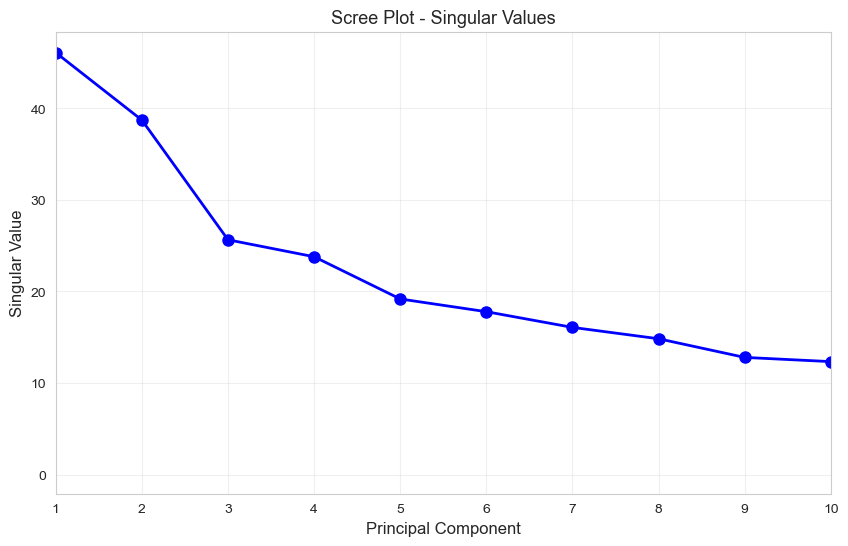

In [5]:
plt.figure(figsize=(10, 6))

plt.plot(range(1, len(s) + 1), s, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Principal Component', fontsize=12)
plt.ylabel('Singular Value', fontsize=12)
plt.xlim(1, 10)
plt.title('Scree Plot - Singular Values', fontsize=13)
plt.grid(True, alpha=0.3)

In [6]:
# --- Top 10 Features Driving PC1 & PC2 ---

# 1. Get Loadings
# Vt rows are the principal components. We transpose to get features as rows.
# We only care about the first two components (columns 0 and 1 after transpose).
loadings = Vt[:2, :].T
feature_names = X.columns

# 2. Calculate "Strength" (Magnitude)
# Strength = sqrt(PC1_loading^2 + PC2_loading^2)
# This tells us how far the feature vector reaches in the PC1-PC2 plot.
magnitudes = np.sqrt(loadings[:, 0]**2 + loadings[:, 1]**2)

# 3. Create DataFrame
features_df = pd.DataFrame({
    'Feature': feature_names,
    'PC1_Loading': loadings[:, 0],
    'PC2_Loading': loadings[:, 1],
    'Strength': magnitudes
})

# 4. Sort by Strength and Get Top 10
top_10 = features_df.sort_values(by='Strength', ascending=False).head(10)

# 5. Display
print("Top 10 Features Driving PC1 and PC2:")
print(top_10[['Feature', 'Strength', 'PC1_Loading', 'PC2_Loading']].to_string(index=False))

Top 10 Features Driving PC1 and PC2:
            Feature  Strength  PC1_Loading  PC2_Loading
       PctRecImmig8  0.255825     0.006481     0.255743
      PctRecImmig10  0.254200     0.003869     0.254171
       PctRecImmig5  0.253304     0.003422     0.253281
     PctRecentImmig  0.249099     0.006043     0.249026
     PctForeignBorn  0.243416     0.029213     0.241657
           pctUrban  0.236136     0.152898     0.179951
          RentHighQ  0.233461     0.193379     0.130799
   PctSpeakEnglOnly  0.217830     0.021832    -0.216733
PctNotSpeakEnglWell  0.214605    -0.045832     0.209654
       OwnOccMedVal  0.210410     0.164471     0.131232


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Drop metadata columns that skew PCA
# We go back to 'combined' which was your clean dataframe before splitting
cols_to_drop = ['ViolentCrimesPerPop', 'state', 'fold']
X_clean = combined.drop(columns=[c for c in cols_to_drop if c in combined.columns])
Y_clean = combined['ViolentCrimesPerPop']

# Crucial: Center the data before PCA (SVD)
X_clean = X_clean - X_clean.mean()

# 2. Re-run PCA (SVD) on the clean data
U_clean, s_clean, Vt_clean = np.linalg.svd(X_clean, full_matrices=False)

# Calculate variance ratios again
total_variance_clean = np.sum(s_clean**2)
explained_variance_clean = s_clean**2 / total_variance_clean
cumulative_variance_clean = np.cumsum(explained_variance_clean)

# 3. Transform X into PCA components
X_pca_clean = U_clean @ np.diag(s_clean)

# Select components explaining 85% variance
k_clean = np.argmax(cumulative_variance_clean >= 0.85) + 1
X_pca_selected_clean = X_pca_clean[:, :k_clean]

print(f"Number of components selected (85% variance): {k_clean}")

# 4. Split Data
X_train, X_test, y_train, y_test = train_test_split(X_pca_selected_clean, Y_clean, test_size=0.2, random_state=42)

# 5. Train Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# 6. Predict & Evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression with Corrected PCA:")
print(f"MSE: {mse:.4f}")
print(f"R2 Score: {r2:.4f}")

Number of components selected (85% variance): 14
Linear Regression with Corrected PCA:
MSE: 0.0175
R2 Score: 0.6351


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Convert Target to Binary Class (High vs Low Crime)
# Since the target is continuous, we need to binarize it for Logistic Regression.
# We'll use the median as the threshold: 1 if > median, 0 otherwise.
threshold = Y_clean.median()
y_binary = (Y_clean > threshold).astype(int)

print(f"Binary Classification Threshold (Median): {threshold:.4f}")

# 2. Split Data (using the same PCA components from the previous step)
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(
    X_pca_selected_clean, y_binary, test_size=0.2, random_state=42
)

# 3. Train Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train_log, y_train_log)

# 4. Predict
y_pred_log = log_model.predict(X_test_log)

# 5. Evaluate
print(f"Logistic Regression Accuracy: {accuracy_score(y_test_log, y_pred_log):.4f}")
print("\nClassification Report:")
print(classification_report(y_test_log, y_pred_log))

Binary Classification Threshold (Median): 0.1500
Logistic Regression Accuracy: 0.8271

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       224
           1       0.83      0.76      0.79       175

    accuracy                           0.83       399
   macro avg       0.83      0.82      0.82       399
weighted avg       0.83      0.83      0.83       399



In [9]:
# --- Compare Linear vs Logistic Regression ---

# 1. Convert Linear Regression Predictions to Binary
# We use the same threshold (median) to classify the continuous predictions
y_pred_linear_binary = (y_pred > threshold).astype(int)

# 2. Calculate Accuracy for Linear Regression (as a classifier)
# We must also binarize the true values (y_test) which are continuous
y_test_binary = (y_test > threshold).astype(int)

linear_accuracy = accuracy_score(y_test_binary, y_pred_linear_binary)
logistic_accuracy = accuracy_score(y_test_log, y_pred_log)

print("--- Model Comparison ---")
print(f"Linear Regression (Thresholded) Accuracy: {linear_accuracy:.4f}")
print(f"Logistic Regression Accuracy:             {logistic_accuracy:.4f}")

if logistic_accuracy > linear_accuracy:
    print("\nLogistic Regression performed better.")
else:
    print("\nLinear Regression (Thresholded) performed better.")

--- Model Comparison ---
Linear Regression (Thresholded) Accuracy: 0.8120
Logistic Regression Accuracy:             0.8271

Logistic Regression performed better.


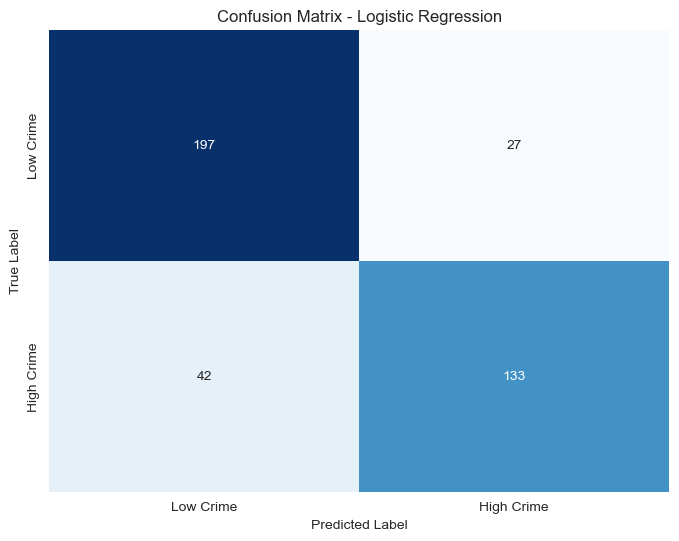

In [10]:
# --- Confusion Matrix Heatmap (Logistic Regression) ---

cm = confusion_matrix(y_test_log, y_pred_log)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Low Crime', 'High Crime'],
            yticklabels=['Low Crime', 'High Crime'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()